# Data Collection and Combination

## Collecting Ebay Data

In [ ]:
# import requests
# import base64

# CLIENT_ID = 'YOUR_EBAY_CLIENT_ID'
# CLIENT_SECRET = 'YOUR_EBAY_CLIENT_SECRET'

# # Encode client credentials
# credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
# encoded_credentials = base64.b64encode(credentials.encode()).decode()

# # Get token
# auth_response = requests.post(
#     'https://api.ebay.com/identity/v1/oauth2/token',
#     headers={
#         'Content-Type': 'application/x-www-form-urlencoded',
#         'Authorization': f'Basic {encoded_credentials}'
#     },
#     data='grant_type=client_credentials&scope=https://api.ebay.com/oauth/api_scope'
# )

# access_token = auth_response.json()['access_token']
# print("Access Token:", access_token)


In [ ]:
# url = "https://api.ebay.com/commerce/taxonomy/v1/get_default_category_tree_id?marketplace_id=EBAY_ES"
# headers = {"Authorization": f"Bearer {access_token}"}
# resp = requests.get(url, headers=headers)
# print(resp.json())

# category_tree_id = resp.json()['categoryTreeId']

In [ ]:
# categories = ['tennis', 'rackets', 'tennis_shoes', 'tennis_bags', 'tennis_clothing', 'tennis_training_aids', 'tennis_balls']
# for cat in categories:
#   search_url = f"https://api.ebay.com/commerce/taxonomy/v1/category_tree/{category_tree_id}/get_category_suggestions?q={cat}"
#   resp = requests.get(search_url, headers=headers)
#   print(resp.json())

In [ ]:
# category_id = "97072"  # replace with the tennis categoryId you found
# browse_url = f"https://api.ebay.com/buy/browse/v1/item_summary/search?category_ids={category_id}&limit=5"

# resp = requests.get(browse_url, headers=headers)
# print(resp.json())


In [ ]:
# import requests
# import csv

# # Replace with your production OAuth token
# OAUTH_TOKEN = access_token

# HEADERS = {
#     "Authorization": f"Bearer {OAUTH_TOKEN}",
#     "Content-Type": "application/json",
#     "Accept": "application/json"
# }

# # Tennis-related category IDs from your JSON
# categories = {
#     "Racquets": "20871",
#     "Tennis & Racket Sports": "159134",
#     "Athletic Shoes": "15709",
#     "Sports Trading Cards": "212",
#     "Racket Ball": "62168",
#     "Active Wear": "185099",
#     "Training Aids": "83053",
#     "Table Tennis, Ping Pong": "97072"
# }

# BASE_URL = "https://api.ebay.com/buy/browse/v1/item_summary/search"

# # Open CSV for writing
# with open("tennis_products.csv", mode="w", newline="", encoding="utf-8") as file:
#     writer = csv.writer(file)
#     writer.writerow(["ItemId","Title", "Category", "Price", "Currency", "URL", "Image",
#                      "SellerFeedbackPercentage", "SellerFeedbackScore", "Condition", "ShippingCostType", "ShippingPrice", "ShippingCurrency",
#                      "MinEstimatedDeliveryDate", "MaxEstimatedDeliveryDate", "ShippingCostType", "ItemLocation", "AdultOnly",
#                      "LegacyItemId", "AvailableCoupons", "ItemOriginDate", "ItemCreationDate", "TopRatedBuyingExperience",
#                      "PriorityListing", "ListingMarketplaceId"])


#     for category_name, category_id in categories.items():
#         total_fetched = 0
#         offset = 0
#         max_items = 1000
#         per_page = 200

#         while (total_fetched < max_items) :

#             params = {
#                 "category_ids": category_id,
#                 "limit": per_page,  # You can increase if needed
#                 "offset":offset
#             }
#             response = requests.get(BASE_URL, headers=HEADERS, params=params)
#             data = response.json()

#             if "itemSummaries" not in data:
#                 print(f"No items found for {category_name}")
#                 continue

#             for item in data["itemSummaries"]:
#               # print(item.get("itemId"))
#                 itemId = item.get("itemId", "")
#                 title = item.get("title", "")
#                 category = item.get("categories", [{}])[0].get("categoryName", "")
#                 price = item.get("price", {}).get("value", "")
#                 currency = item.get("price", {}).get("currency", "")
#                 url = item.get("itemWebUrl", "")
#                 image = item.get("image", {}).get("imageUrl", "")
#                 sellerFeedbackPercentage = item.get("seller", {}).get("feedbackPercentage", "")
#                 sellerFeedbackScore = item.get("seller", {}).get("feedbackScore", "")
#                 condition = item.get("condition", "")
#                 shippingCostType = item.get("shippingOptions", [{}])[0].get("shippingCostType", "")
#                 shippingPrice = item.get("shippingOptions", [{}])[0].get("shippingCost", {}).get("value", "")
#                 shippingCurrency = item.get("shippingOptions", [{}])[0].get("shippingCost", {}).get("currency", "")
#                 minEstimatedDeliveryDate = item.get("shippingOptions", [{}])[0].get("minEstimatedDeliveryDate", "")
#                 maxEstimatedDeliveryDate = item.get("shippingOptions", [{}])[0].get("maxEstimatedDeliveryDate", "")
#                 itemLocation = item.get("itemLocation", {}).get("country", "")
#                 adultOnly = item.get("adultOnly", "")
#                 legacyItemId = item.get("legacyItemId", "")
#                 availableCoupons = item.get("availableCoupons", "")
#                 itemOriginDate = item.get("itemOriginDate", "")
#                 itemCreationDate = item.get("itemCreationDate", "")
#                 topRatedBuyingExperience = item.get("topRatedBuyingExperience", "")
#                 priorityListing = item.get("priorityListing", "")
#                 listingMarketPlaceId = item.get("listingMarketPlaceId", "")


#                 writer.writerow([itemId, title, category, price, currency, url, image, sellerFeedbackPercentage, sellerFeedbackScore, condition,
#                 shippingCostType, shippingPrice, shippingCurrency, minEstimatedDeliveryDate, maxEstimatedDeliveryDate, itemLocation,
#                 adultOnly, legacyItemId, availableCoupons, itemOriginDate, itemCreationDate, topRatedBuyingExperience, priorityListing, listingMarketPlaceId])


#                 total_fetched += 1
#             offset += per_page

#         print(f"Fetched {total_fetched} items for category: {category_name}")
# print("✅ Tennis product data saved to tennis_products.csv")

In [ ]:
# import pandas as pd
# pd.set_option('display.max_columns', None)
# tennis = pd.read_csv('tennis_products.csv')
# tennis

In [ ]:
# tennis['ItemId'].duplicated()

In [ ]:
# tennis.to_csv('data/ebay_tennis_data.csv', index=False)

In [ ]:
# import pandas as pd
# tennis = pd.read_csv('data/ebay_tennis_data.csv')

## Collecting Pytrends Data

In [ ]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# eng_stopwords = set(stopwords.words('english'))

In [ ]:
# import re
# from collections import Counter
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
# lem = WordNetLemmatizer()

# def clean_text(text):
#   text = text.lower()
#   text = re.sub(r"[^a-z0-9\s]", "", text)
#   words = [lem.lemmatize(word) for word in text.split() if word not in eng_stopwords and len(word) > 2]
#   return words

In [ ]:
# combined = tennis['Title'] + ' ' + tennis['Category']

In [ ]:
# result = combined.apply(clean_text)

# title_keywords = []
# for t in result:
#   title_keywords.extend(t)

# title_freq = Counter(title_keywords)
# top_keywords = [word for word, _ in title_freq.most_common(4000)]

Collecting pytrends data is a bit tricky. This code cell may stop running and provides 402 error due to request limit. Try changing your ip address using VPN then try again. Save the trend data to a file each time you run the cell, and keep on update the keywords required from the list.

In [ ]:
# #change the numbers of keywords required, due to request limit. And save the files.
# top_keywords = top_keywords[3000:]

In [ ]:
# from pytrends.request import TrendReq
# import datetime
# from time import sleep

# # count = 0
# full_result = pd.DataFrame({})
# current_date = datetime.date.today()
# previous_month = datetime.date.today() -  datetime.timedelta(days=30)
# previous_month
# pytrends = TrendReq(hl='en-US', tz=360)
# for i in range(int(len(top_keywords)/5)):
#   pytrends.build_payload(top_keywords[i*5:i*5+5], cat=0, timeframe=f'{previous_month} {current_date}', geo='', gprop='')
#   result = pytrends.interest_over_time()[top_keywords[i*5:i*5+5]].mean()
#   result = result[(result != 0)]
#   full_result = pd.concat([full_result, result])
#   sleep(3)
#   # count = count + len(result)
#   # if count >= 300:
#   #   break

In [ ]:
# full_result

In [ ]:
# full_result = full_result.reset_index().rename(columns={'index':'word', 0:'score'})

In [ ]:
# full_result.to_csv(f'data/trend_scores_{str(datetime.datetime.now())}.csv', index = False)

In [ ]:
# trend_score1 = pd.read_csv('data/trend_scores_2025-08-14 04:53:17.234811.csv')
# trend_score2 = pd.read_csv('data/trend_scores_2025-08-14 05:05:45.385225.csv')
# trend_score3 = pd.read_csv('data/trend_scores_2025-08-14 05:22:56.935681.csv')
# trend_score4 = pd.read_csv('data/trend_scores_2025-08-14 05:40:42.917833.csv')
# trend_score5 = pd.read_csv('data/trend_scores_2025-08-14 06:01:38.034954.csv')

In [ ]:
# full_result = pd.concat([trend_score1, trend_score2, trend_score3, trend_score4, trend_score5]).reset_index().drop(columns=['index'])

In [ ]:
# for w in trend_score4['word']:
#   if w in trend_score5['word']:
#     print('yes')

In [ ]:
# def find_frequent_score(text):
#   score = 0
#   words = text.split()
#   for w in words:
#     if w in full_result['word'].tolist():
#       word_score = full_result[full_result['word'] == w]['score'].iloc[0]
#       score = score + word_score * words.count(w)

#   return score

In [ ]:
# pytrends_out = combined.apply(find_frequent_score)
# pytrends_out.name = 'KeywordTrend'

In [ ]:
# from matplotlib import pyplot as plt
# plt.plot(pytrends_out.index,pytrends_out)

In [ ]:
# (pytrends_out>0).sum()

In [ ]:
# pytrends_out

## Collecting Sofascore Data

In [ ]:
# !pip install webdriver-manager
# !pip install -y chromium-browser
# # Install chromium and chromium-driver
# !apt-get update
# !apt-get install chromium-bsu chromium-driver

# # Install selenium
# !pip install selenium

In [ ]:
# import json
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options
# import datetime

# chrome_options = Options()
# chrome_options.add_argument("--headless")
# chrome_options.add_argument("--no-sandbox")
# chrome_options.add_argument("--disable-dev-shm-usage")
# chrome_options.add_argument("--disable-gpu")
# chrome_options.add_argument("--window-size=1920,1080")

# driver = webdriver.Chrome(options=chrome_options)

# end_date = datetime.date.today()
# start_date = datetime.date.today() -  datetime.timedelta(days=30)

# dates_list = []
# while start_date <= end_date:
#   dates_list.append(start_date.strftime("%Y-%m-%d"))
#   start_date += datetime.timedelta(days=1)

# sofascore_data = []

# for date in dates_list:
#   driver.get(f"https://api.sofascore.com/api/v1/sport/tennis/scheduled-events/{date}")

#   html = driver.page_source

#   start = html.find('<pre>') + len('<pre>')
#   end = html.find('</pre>')
#   json_str = html[start:end]

#   data = json.loads(json_str)

#   sofascore_data.append(data)

# driver.quit()


In [ ]:
# len(sofascore_data)

In [ ]:
# import pandas as pd

# def extract_important_features(data):
#     events = data.get('events', [])
#     rows = []
#     for event in events:
#         row = {}
#         # Basic event info
#         row['event_id'] = event.get('id')
#         row['slug'] = event.get('slug')
#         row['start_timestamp'] = event.get('startTimestamp')
#         row['status'] = event.get('status', {}).get('description')

#         # Round info
#         row['round'] = event.get('roundInfo', {}).get('name')

#         # Ground type
#         row['ground_type'] = event.get('groundType')

#         # Tournament info
#         tournament = event.get('tournament', {})
#         row['tournament_name'] = tournament.get('name')
#         row['tournament_slug'] = tournament.get('slug')
#         category = tournament.get('category', {})
#         row['tournament_category'] = category.get('name')

#         # Season info
#         season = event.get('season', {})
#         row['season_name'] = season.get('name')
#         row['season_year'] = season.get('year')

#         # Home team/player info
#         home = event.get('homeTeam', {})
#         row['home_team_name'] = home.get('name')
#         row['home_team_country'] = home.get('country', {}).get('name')
#         row['home_team_user_count'] = home.get('userCount')

#         # Away team/player info
#         away = event.get('awayTeam', {})
#         row['away_team_name'] = away.get('name')
#         row['away_team_country'] = away.get('country', {}).get('name')
#         row['away_team_user_count'] = away.get('userCount')

#         # Scores (may be empty)
#         home_score = event.get('homeScore', {})
#         away_score = event.get('awayScore', {})
#         # Using 'current' score if available, else None
#         row['home_score'] = home_score.get('current') if home_score else None
#         row['away_score'] = away_score.get('current') if away_score else None

#         rows.append(row)

#     df = pd.DataFrame(rows)
#     return df

# # Usage:
# # data = ... # your loaded JSON from Sofascore API
# sofascore_data_df = pd.DataFrame()
# for data in sofascore_data:
#   df = extract_important_features(data)
#   sofascore_data_df = pd.concat([sofascore_data_df, df])

# sofascore_data_df.head()


In [ ]:
# sofascore_data_df.shape

In [ ]:
# sofascore_data_df.to_csv('data/sofascore_data_df.csv', index=False)

In [ ]:
# import pandas as pd
# sofascore_data_df = pd.read_csv('data/sofascore_data_df.csv')

In [ ]:
# sofascore_data_df.event_id.duplicated().sum()

In [ ]:
# sofascore_data_df.drop_duplicates(inplace=True)

In [ ]:
# sofascore_data_df = sofascore_data_df.reset_index().drop(columns=['index'])

In [ ]:
# sofascore_usa = sofascore_data_df[sofascore_data_df['home_team_country']=='USA']

In [ ]:
# sofascore_usa

In [ ]:
# sofascore_words = sofascore_usa['ground_type'] + ' ' + sofascore_usa['tournament_name'] + ' ' + sofascore_usa['tournament_category'] + ' ' + sofascore_usa['season_name']+ ' ' + sofascore_usa['home_team_name'] + ' ' +  sofascore_usa['home_team_country']
# sofascore_words = pd.DataFrame({'words':sofascore_words})
# sofascore_words['home_team_user_count'] = sofascore_usa['home_team_user_count']
# sofascore_words['home_score'] = sofascore_usa['home_score']

In [ ]:
# sofascore_words.dropna(inplace=True)

In [ ]:
# sofascore_words = sofascore_words.reset_index().drop(columns=['index'])

In [ ]:
# sofascore_words

In [ ]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# eng_stopwords = set(stopwords.words('english'))

In [ ]:
# import re
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
# lem = WordNetLemmatizer()

# def clean_text(text):
#   text = text.lower()
#   text = re.sub(r"[^a-z0-9\s]", "", text)
#   words = [lem.lemmatize(word) for word in text.split() if word not in eng_stopwords and len(word) > 2]
#   return words

In [ ]:
# sofascore_words['words'] = sofascore_words['words'].apply(clean_text)

In [ ]:
# sofascore_words

### home team user count

In [ ]:
# from collections import defaultdict

# user_count_dict = defaultdict(lambda: [0, 0])
# id = 0
# for words in sofascore_words['words'].tolist():
#   for word in words:
#     user_count_dict[word][0] += sofascore_words['home_team_user_count'][id]
#     user_count_dict[word][1] += 1
#   id += 1

In [ ]:
# avg_user_count_dict = {k:round(v[0]/v[1], 2) for k, v in user_count_dict.items()}

In [ ]:
# avg_user_count_df = pd.DataFrame(list(avg_user_count_dict.items()), columns=['keyword','avg_user_count_score'])

In [ ]:
# avg_user_count_df

In [ ]:
# avg_user_count_df.to_csv('data/avg_user_count_df.csv', index=False)

In [ ]:
# result = combined.apply(clean_text)

In [ ]:
# def find_user_count_score(text):
#   score = 0
#   for word in text:
#     if word in avg_user_count_dict.keys():
#       score = score + avg_user_count_dict[word]
#   return score

# find_user_count_score(['This', 'is', 'red', 'clay', 'usa'])

In [ ]:
# avg_user_count_out = result.apply(find_user_count_score)
# avg_user_count_out.name = 'AvgUserCountScore'

In [ ]:
# (avg_user_count_out > 0).sum()

### home score

In [ ]:
# from collections import defaultdict

# home_score_dict = defaultdict(lambda: [0, 0])
# id = 0
# for words in sofascore_words['words'].tolist():
#   for word in words:
#     home_score_dict[word][0] += sofascore_words['home_score'][id]
#     home_score_dict[word][1] += 1
#   id += 1

In [ ]:
# avg_home_score_dict = {k:round(v[0]/v[1], 2) for k, v in home_score_dict.items()}

In [ ]:
# avg_home_score_df = pd.DataFrame(list(avg_home_score_dict.items()), columns=['keyword', 'avg_home_score'])

In [ ]:
# avg_home_score_df

In [ ]:
# avg_home_score_df.to_csv('data/avg_home_score_df.csv', index=False)

In [ ]:
# def find_home_score(text):
#   score = 0
#   for word in text:
#     if word in avg_home_score_dict.keys():
#       score = score + avg_home_score_dict[word]
#   return score

# find_home_score(['This', 'is', 'red', 'clay', 'usa'])

In [ ]:
# avg_home_score_out = result.apply(find_home_score)
# avg_home_score_out.name = 'AvgHomeScore'

In [ ]:
# (avg_home_score_out > 0).sum()

## Final Data

In [ ]:
# ebay_product_price = pd.concat([tennis, pytrends_out, avg_user_count_out, avg_home_score_out], axis = 1)

In [ ]:
# ebay_product_price.to_csv('data/ebay_product_price.csv', index=False)

# Machine Learning

## Importing Essential Python libraries

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [ ]:
# basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.model_selection import train_test_split

# data preprocessing libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.base import BaseEstimator, TransformerMixin

# machine learning libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# model finetuning libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv

from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV

# data validation libraries
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import root_mean_squared_error


## Get the data

In [2]:
df = pd.read_csv('data/ebay_product_price.csv')
df_exp = df.copy()
df_pipe = df.copy()

### Quick look at the Data

In [ ]:
df.describe()

,Price,SellerFeedbackPercentage,SellerFeedbackScore,ShippingPrice,LegacyItemId,ListingMarketplaceId,KeywordTrend,AvgUserCountScore,AvgHomeScore
count,8000.000000,8000.000000,8.000000e+03,7186.000000,8.000000e+03,0.0,8000.000000,8000.000000,8000.000000
mean,79.197101,98.604400,3.849591e+04,3.088517,2.711776e+11,NaN,20.426496,1016.549532,0.641331
std,221.354437,7.036477,1.092332e+05,7.484693,8.753424e+10,NaN,44.210556,2740.128852,0.828629
min,0.720000,0.000000,0.000000e+00,0.000000,1.117473e+11,NaN,0.000000,0.000000,0.000000
25%,14.990000,98.500000,4.637500e+02,0.000000,1.874401e+11,NaN,0.000000,0.000000,0.000000
50%,38.075000,99.600000,3.121000e+03,0.000000,2.773224e+11,NaN,0.000000,0.000000,0.000000
75%,101.640000,100.000000,1.387375e+04,4.360000,3.566857e+11,NaN,15.709677,697.640000,1.140000
max,10000.230000,100.000000,1.243042e+06,225.500000,4.061308e+11,NaN,782.129032,75161.760000,4.900000


In [ ]:
df.describe(include=object)

,ItemId,Title,Category,Currency,URL,Image,Condition,ShippingCostType,ShippingCurrency,MinEstimatedDeliveryDate,MaxEstimatedDeliveryDate,ItemLocation,ItemOriginDate,ItemCreationDate
count,8000,8000,8000,8000,8000,7999,7998,7803,7186,5366,5366,8000,8000,8000
unique,7387,6931,78,1,7376,7097,27,2,1,18,24,47,6758,6727
top,v1|314680928169|0,Professional Tennis Ball Cart Rolling Cart For...,Racquets,USD,https://www.ebay.com/itm/406054470342?hash=ite...,https://i.ebayimg.com/images/g/zeUAAOSwKuJnR-Z...,New,FIXED,USD,2025-08-16T07:00:00.000Z,2025-08-19T07:00:00.000Z,US,2025-08-14T03:52:08.000Z,2025-08-14T03:52:08.000Z
freq,4,40,1303,8000,4,37,2807,7134,7186,2273,1481,6228,71,71


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ItemId                    8000 non-null   object 
 1   Title                     8000 non-null   object 
 2   Category                  8000 non-null   object 
 3   Price                     8000 non-null   float64
 4   Currency                  8000 non-null   object 
 5   URL                       8000 non-null   object 
 6   Image                     7999 non-null   object 
 7   SellerFeedbackPercentage  8000 non-null   float64
 8   SellerFeedbackScore       8000 non-null   int64  
 9   Condition                 7998 non-null   object 
 10  ShippingCostType          7803 non-null   object 
 11  ShippingPrice             7186 non-null   float64
 12  ShippingCurrency          7186 non-null   object 
 13  MinEstimatedDeliveryDate  5366 non-null   object 
 14  MaxEstim

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,ItemId,Title,Category,Price,Currency,URL,Image,SellerFeedbackPercentage,SellerFeedbackScore,Condition,ShippingCostType,ShippingPrice,ShippingCurrency,MinEstimatedDeliveryDate,MaxEstimatedDeliveryDate,ItemLocation,AdultOnly,LegacyItemId,AvailableCoupons,ItemOriginDate,ItemCreationDate,TopRatedBuyingExperience,PriorityListing,ListingMarketplaceId,KeywordTrend,AvgUserCountScore,AvgHomeScore
0,v1|177337411650|0,2020 Babolat Pure Aero VS 4 1/4 Tennis Racquet...,Racquets,140.00,USD,https://www.ebay.com/itm/177337411650?hash=ite...,https://i.ebayimg.com/images/g/vF4AAeSwsOJonUo...,100.0,153,Used,CALCULATED,NaN,NaN,NaN,NaN,US,False,177337411650,False,2025-08-14T02:33:30.000Z,2025-08-14T02:33:30.000Z,False,True,NaN,64.451613,0.00,0.00
1,v1|317176317654|0,USED Head Youtek Ig Radical Mp G2 new Replacem...,Racquets,137.00,USD,https://www.ebay.com/itm/317176317654?hash=ite...,https://i.ebayimg.com/images/g/HdcAAeSwtEBonWM...,100.0,6,Used,FIXED,0.0,USD,NaN,NaN,JP,False,317176317654,False,2025-08-14T04:27:56.000Z,2025-08-14T04:27:56.000Z,False,True,NaN,133.290323,57.67,1.00
2,v1|336123291741|0,Head Ti.S6 Titanium Tennis Racket 4 1/4 Grip T...,Racquets,47.69,USD,https://www.ebay.com/itm/336123291741?hash=ite...,https://i.ebayimg.com/images/g/p1EAAeSwzkJonKU...,89.2,2089,Used,FIXED,0.0,USD,2025-08-16T07:00:00.000Z,2025-08-21T07:00:00.000Z,US,False,336123291741,False,2025-08-13T14:45:33.000Z,2025-08-13T14:45:33.000Z,False,True,NaN,0.000000,57.67,1.00
3,v1|336123290863|0,Head Metallix 2 Tennis Racquet . 4-3/8 . Austr...,Racquets,53.99,USD,https://www.ebay.com/itm/336123290863?hash=ite...,https://i.ebayimg.com/images/g/S8QAAeSwOfNonKT...,89.2,2089,Used,FIXED,0.0,USD,2025-08-16T07:00:00.000Z,2025-08-21T07:00:00.000Z,US,False,336123290863,False,2025-08-13T14:45:12.000Z,2025-08-13T14:45:12.000Z,False,True,NaN,52.483871,234.93,1.82
4,v1|225766220022|524871886091,YONEX 2022 Model REGNA 98 02RGN98/02RGN98C Ten...,Racquets,549.00,USD,https://www.ebay.com/itm/225766220022?hash=ite...,https://i.ebayimg.com/images/g/gVsAAOSwfVNlDXa...,100.0,665,New,FIXED,0.0,USD,NaN,NaN,JP,False,225766220022,False,2023-09-10T02:15:17.000Z,2023-09-10T02:15:17.000Z,True,False,NaN,56.258065,0.00,0.00


In [ ]:
missing_values = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns=['MissingValues']).style.background_gradient('viridis')
missing_values

,MissingValues
ListingMarketplaceId,8000
MaxEstimatedDeliveryDate,2634
MinEstimatedDeliveryDate,2634
ShippingCurrency,814
ShippingPrice,814
ShippingCostType,197
Condition,2
Image,1
Category,0
ItemId,0


ItemId is repeated in LegacyItemId.

ShippingCurrency and Currency are solely in USD so we can remove these columns.

ShippingCostType.1 is repeated so we will drop this column.

ListingMarketPlaceId is NaN completely so we will drop this column.



In [ ]:
df.ItemId.duplicated().sum()

np.int64(613)

In [ ]:
df['ItemId'].drop_duplicates()

,ItemId
0,v1|177337411650|0
1,v1|317176317654|0
2,v1|336123291741|0
3,v1|336123290863|0
4,v1|225766220022|524871886091
...,...
7995,v1|127305408972|0
7996,v1|177117347781|0
7997,v1|297527971572|0
7998,v1|317155455391|0


In [ ]:
df.drop(df[df.ItemId.duplicated()].index, inplace=True)

In [ ]:
df = df.reset_index().drop(columns=['index'])

In [ ]:
df.ItemId.duplicated().sum()

np.int64(0)

## Exploring and Visualizing Data

In [ ]:
df

,ItemId,Title,Category,Price,Currency,URL,Image,SellerFeedbackPercentage,SellerFeedbackScore,Condition,ShippingCostType,ShippingPrice,ShippingCurrency,MinEstimatedDeliveryDate,MaxEstimatedDeliveryDate,ItemLocation,AdultOnly,LegacyItemId,AvailableCoupons,ItemOriginDate,ItemCreationDate,TopRatedBuyingExperience,PriorityListing,ListingMarketplaceId,KeywordTrend,AvgUserCountScore,AvgHomeScore
0,v1|177337411650|0,2020 Babolat Pure Aero VS 4 1/4 Tennis Racquet...,Racquets,140.00,USD,https://www.ebay.com/itm/177337411650?hash=ite...,https://i.ebayimg.com/images/g/vF4AAeSwsOJonUo...,100.0,153,Used,CALCULATED,NaN,NaN,NaN,NaN,US,False,177337411650,False,2025-08-14T02:33:30.000Z,2025-08-14T02:33:30.000Z,False,True,NaN,64.451613,0.00,0.00
1,v1|317176317654|0,USED Head Youtek Ig Radical Mp G2 new Replacem...,Racquets,137.00,USD,https://www.ebay.com/itm/317176317654?hash=ite...,https://i.ebayimg.com/images/g/HdcAAeSwtEBonWM...,100.0,6,Used,FIXED,0.00,USD,NaN,NaN,JP,False,317176317654,False,2025-08-14T04:27:56.000Z,2025-08-14T04:27:56.000Z,False,True,NaN,133.290323,57.67,1.00
2,v1|336123291741|0,Head Ti.S6 Titanium Tennis Racket 4 1/4 Grip T...,Racquets,47.69,USD,https://www.ebay.com/itm/336123291741?hash=ite...,https://i.ebayimg.com/images/g/p1EAAeSwzkJonKU...,89.2,2089,Used,FIXED,0.00,USD,2025-08-16T07:00:00.000Z,2025-08-21T07:00:00.000Z,US,False,336123291741,False,2025-08-13T14:45:33.000Z,2025-08-13T14:45:33.000Z,False,True,NaN,0.000000,57.67,1.00
3,v1|336123290863|0,Head Metallix 2 Tennis Racquet . 4-3/8 . Austr...,Racquets,53.99,USD,https://www.ebay.com/itm/336123290863?hash=ite...,https://i.ebayimg.com/images/g/S8QAAeSwOfNonKT...,89.2,2089,Used,FIXED,0.00,USD,2025-08-16T07:00:00.000Z,2025-08-21T07:00:00.000Z,US,False,336123290863,False,2025-08-13T14:45:12.000Z,2025-08-13T14:45:12.000Z,False,True,NaN,52.483871,234.93,1.82
4,v1|225766220022|524871886091,YONEX 2022 Model REGNA 98 02RGN98/02RGN98C Ten...,Racquets,549.00,USD,https://www.ebay.com/itm/225766220022?hash=ite...,https://i.ebayimg.com/images/g/gVsAAOSwfVNlDXa...,100.0,665,New,FIXED,0.00,USD,NaN,NaN,JP,False,225766220022,False,2023-09-10T02:15:17.000Z,2023-09-10T02:15:17.000Z,True,False,NaN,56.258065,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,v1|127305408972|0,Foldable Table Tennis Table Outdoor/Indoor Pin...,Tables,77.76,USD,https://www.ebay.com/itm/127305408972?hash=ite...,https://i.ebayimg.com/images/g/ATIAAOSwgbdhuHj...,98.1,6624,New,FIXED,0.00,USD,2025-08-15T07:00:00.000Z,2025-08-19T07:00:00.000Z,US,False,127305408972,False,2025-08-13T02:19:00.000Z,2025-08-13T02:19:00.000Z,True,False,NaN,0.000000,0.00,0.00
7383,v1|177117347781|0,Killerspin JET600 Ping Pong Paddle Table Tenni...,Paddles,34.99,USD,https://www.ebay.com/itm/177117347781?hash=ite...,https://i.ebayimg.com/images/g/XrgAAeSw00NoMBT...,100.0,1879,Used,FIXED,0.00,USD,2025-08-15T07:00:00.000Z,2025-08-18T07:00:00.000Z,US,False,177117347781,False,2025-05-23T06:31:45.000Z,2025-05-23T06:31:45.000Z,True,False,NaN,85.161290,0.00,0.00
7384,v1|297527971572|0,Harvard Performance USA IMPACT Table Tennis Ra...,Paddles,19.97,USD,https://www.ebay.com/itm/297527971572?hash=ite...,https://i.ebayimg.com/images/g/tQMAAeSwIvxolq~...,98.9,2520,New,CALCULATED,NaN,NaN,NaN,NaN,US,False,297527971572,False,2025-08-09T02:56:24.000Z,2025-08-09T02:56:24.000Z,False,False,NaN,0.000000,1913.10,1.15
7385,v1|317155455391|0,Suz Table Tennis Robot Ping Pong Ball Machine ...,"Other Table Tennis, Ping Pong",179.99,USD,https://www.ebay.com/itm/317155455391?hash=ite...,https://i.ebayimg.com/images/g/n8UAAOSwUjRnP~t...,98.7,1677,Used,FIXED,49.87,USD,2025-08-18T07:00:00.000Z,2025-08-23T07:00:00.000Z,US,False,317155455391,False,2025-08-07T18:00:00.000Z,2025-08-07T18:00:00.000Z,False,True,NaN,0.000000,0.00,0.00


In [ ]:
df['ItemIdFormatVersion'] = df['ItemId'].apply(lambda x: x.split('|')[0])
df['ItemIdCore'] = df['ItemId'].apply(lambda x: x.split('|')[1]).astype(int)
df['ItemIdVariation'] = df['ItemId'].apply(lambda x: x.split('|')[2]).astype(int)

ItemIdVariation is non zero is the variation of the same product like color (Black, Red, Blue) or Edition(2023, 2025). The seller used this variation to avoid listing another similar product.

In [ ]:
df['ItemIdFormatVersion'].value_counts()

,count
ItemIdFormatVersion,
v1,7387


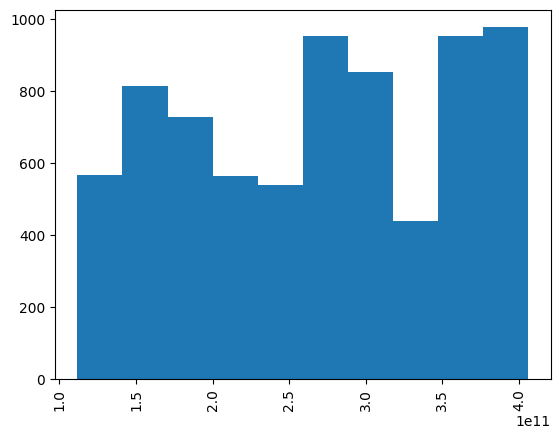

In [ ]:
plt.hist(df['ItemIdCore'])
plt.xticks(rotation=90)
plt.show()

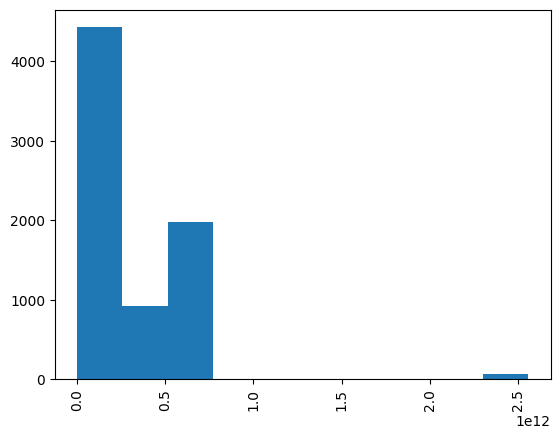

In [ ]:
plt.hist(df['ItemIdVariation'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['ProductVariation'] = df['ItemIdVariation'] > 0

In [ ]:
df.loc[6, 'PriorityListing']

np.False_

[]

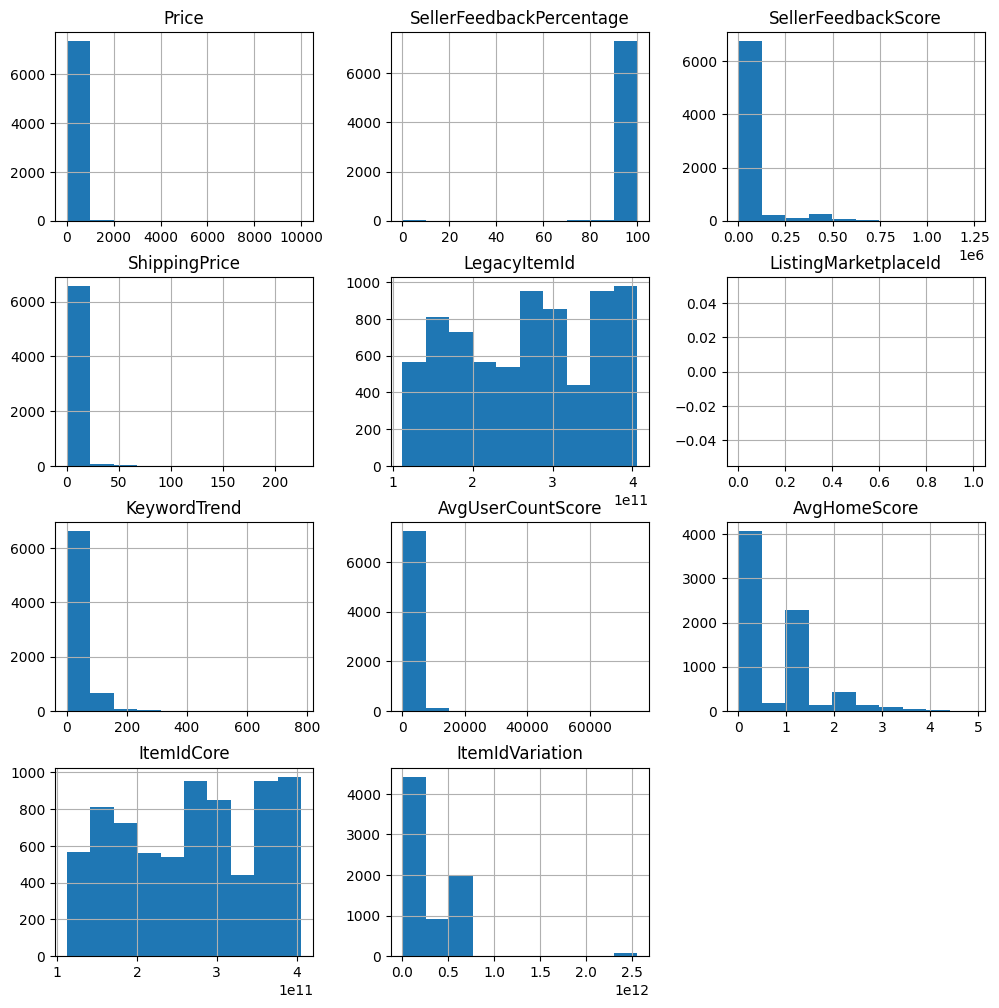

In [ ]:
df.hist(figsize=(12, 12))
plt.plot()

Most of the features are rightly skewed so we will apply log transformation.

For Left-skewed data we will first inverse it and then apply log transformation.

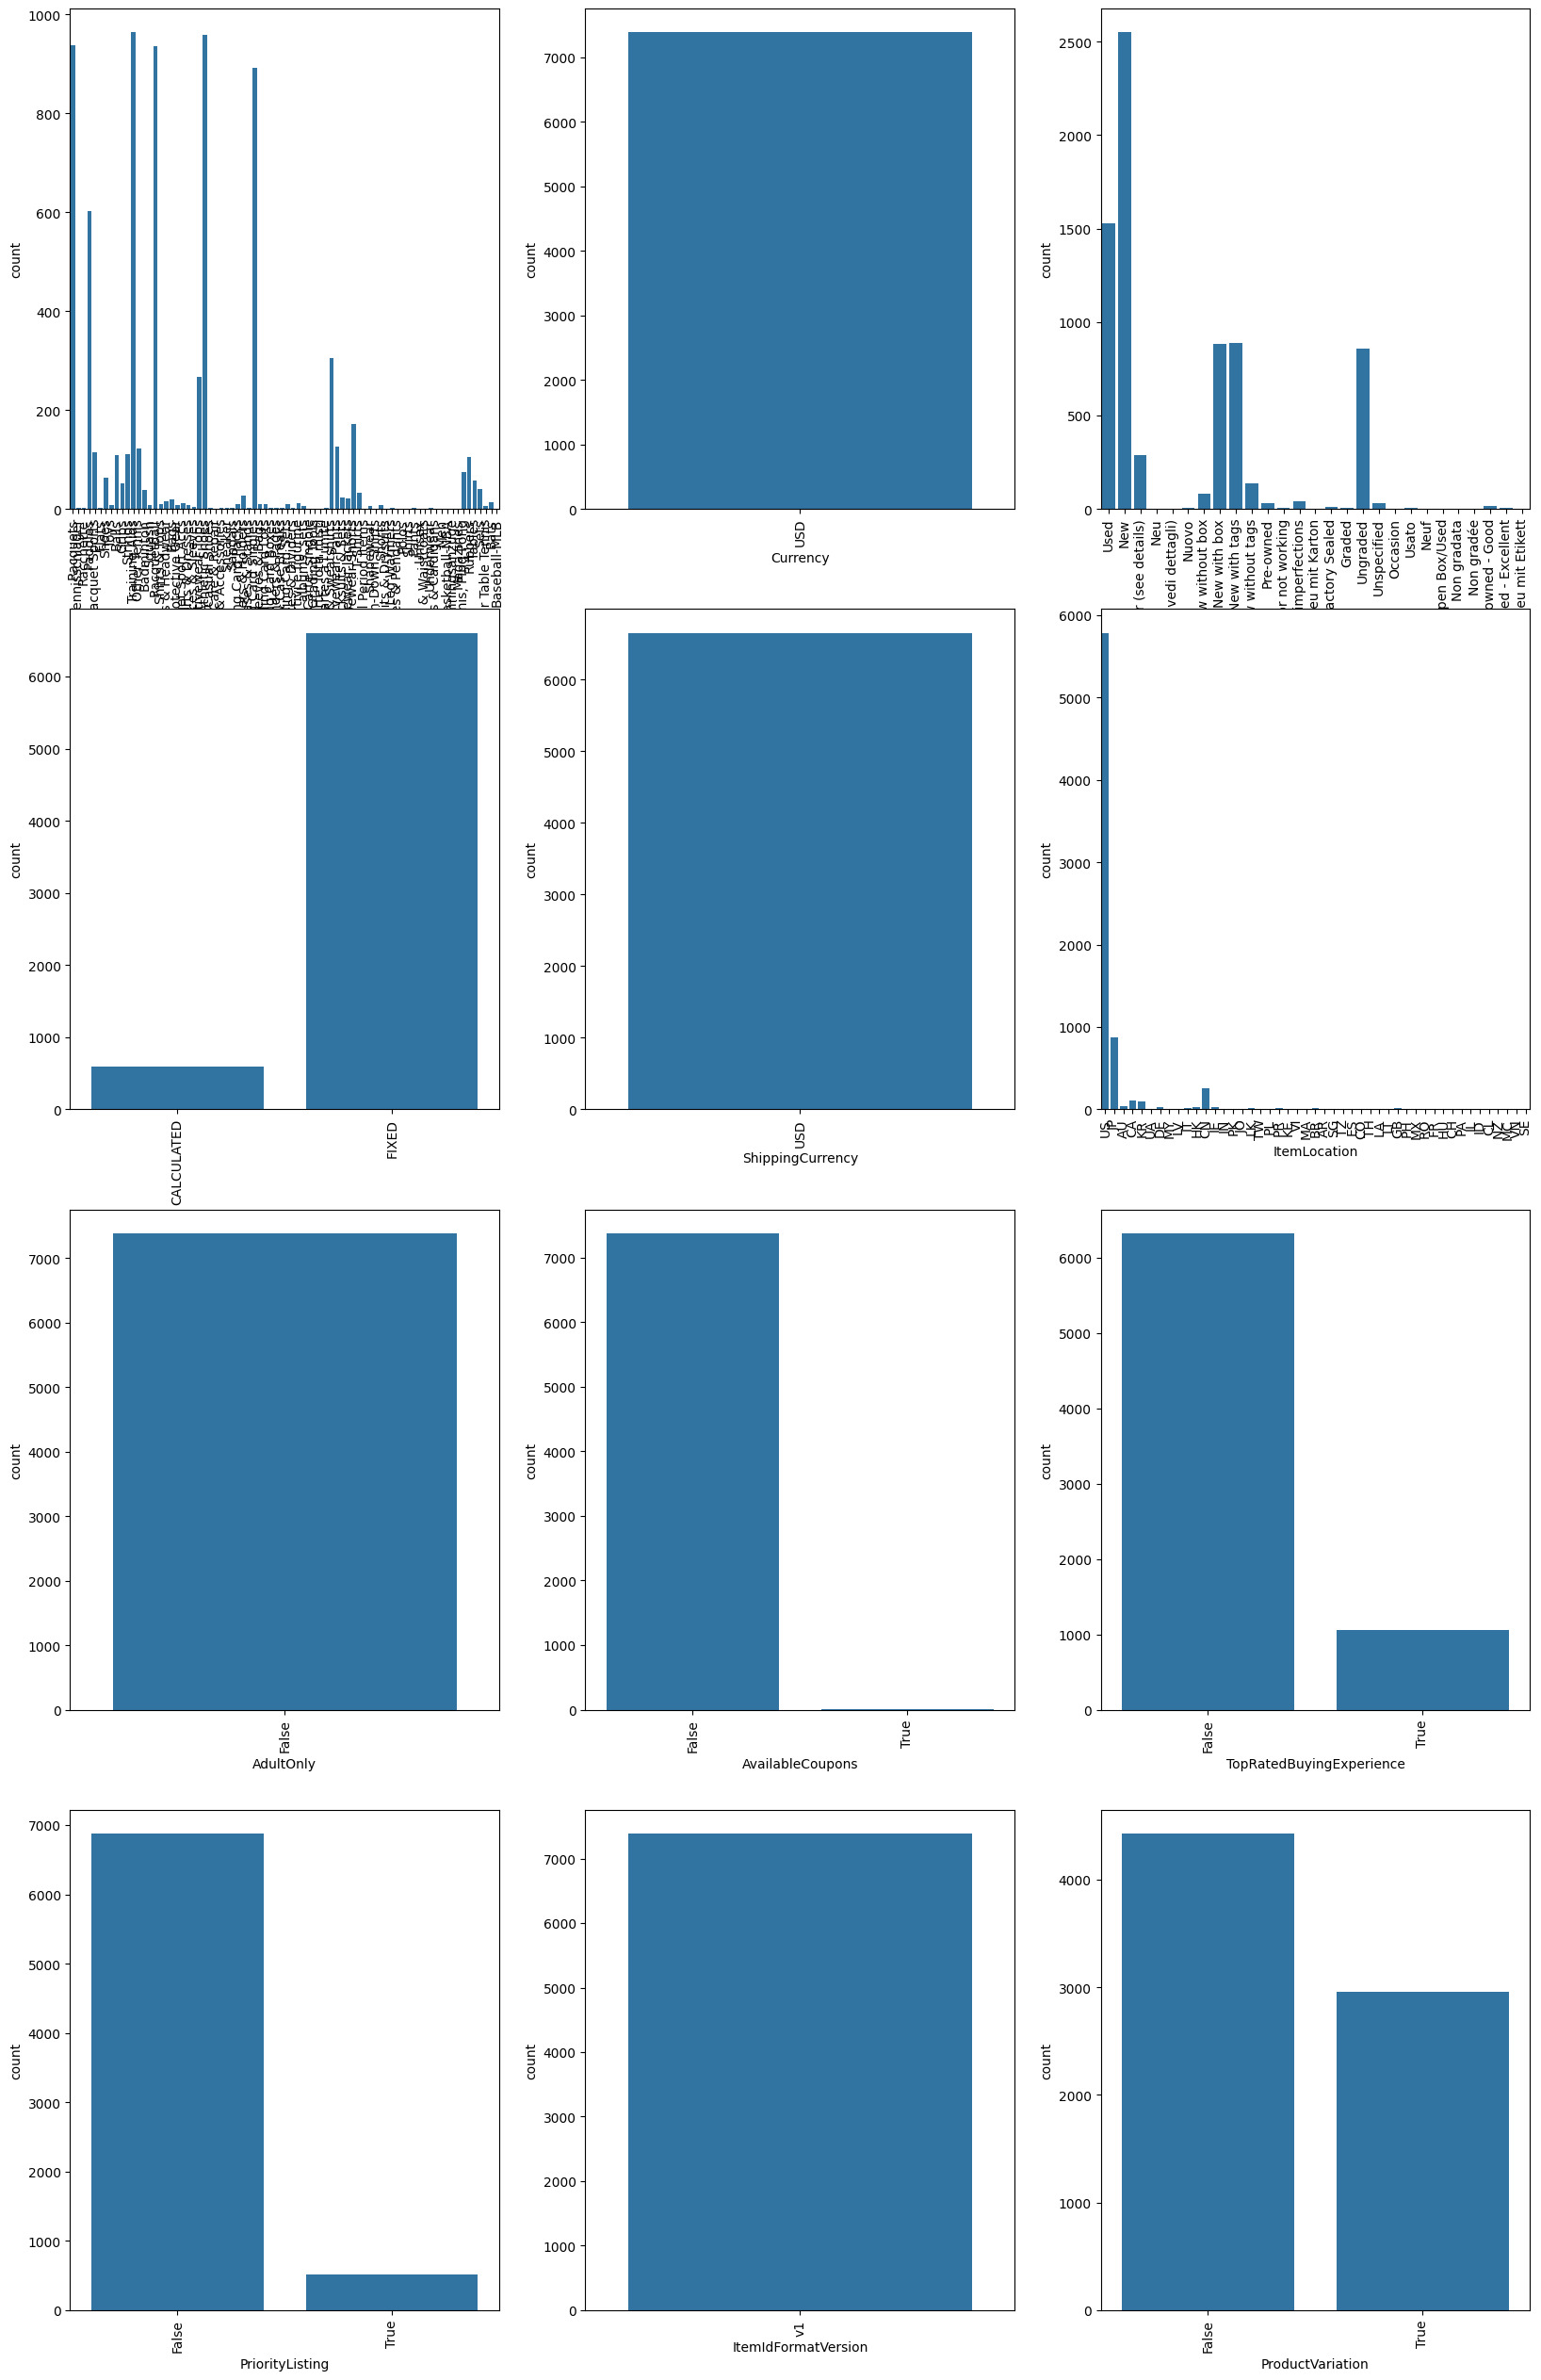

In [ ]:
nominal_cols = ['Category', 'Currency', 'Condition', 'ShippingCostType', 'ShippingCurrency', 'ItemLocation',
                'AdultOnly', 'AvailableCoupons', 'TopRatedBuyingExperience', 'PriorityListing', 'ItemIdFormatVersion', 'ProductVariation']

plt.figure(figsize=(20, 40))
for i in range(len(nominal_cols)):
  plt.subplot(5, 3, i+1)
  sns.countplot(x=nominal_cols[i], data=df)
  plt.xticks(rotation=90)

We will drop Currency and ShippingCurrency since it is only in USD

In [ ]:
pd.set_option('display.max_rows', None)
pd.DataFrame(df['Category'].value_counts()).style.background_gradient('viridis')

,count
Category,
Training Aids,964
Athletic Shoes,959
Racquets,938
Racquetball,937
Trading Card Singles,893
Paddles,602
Hoodies & Sweatshirts,306
Activewear Tops,268
Activewear Shorts,171


In [ ]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

,Price
Price,1.000000
ShippingPrice,0.123824
LegacyItemId,0.037998
ItemIdCore,0.037998
AvailableCoupons,0.029073
PriorityListing,0.025735
KeywordTrend,-0.003198
SellerFeedbackScore,-0.035764
TopRatedBuyingExperience,-0.038922
SellerFeedbackPercentage,-0.045336


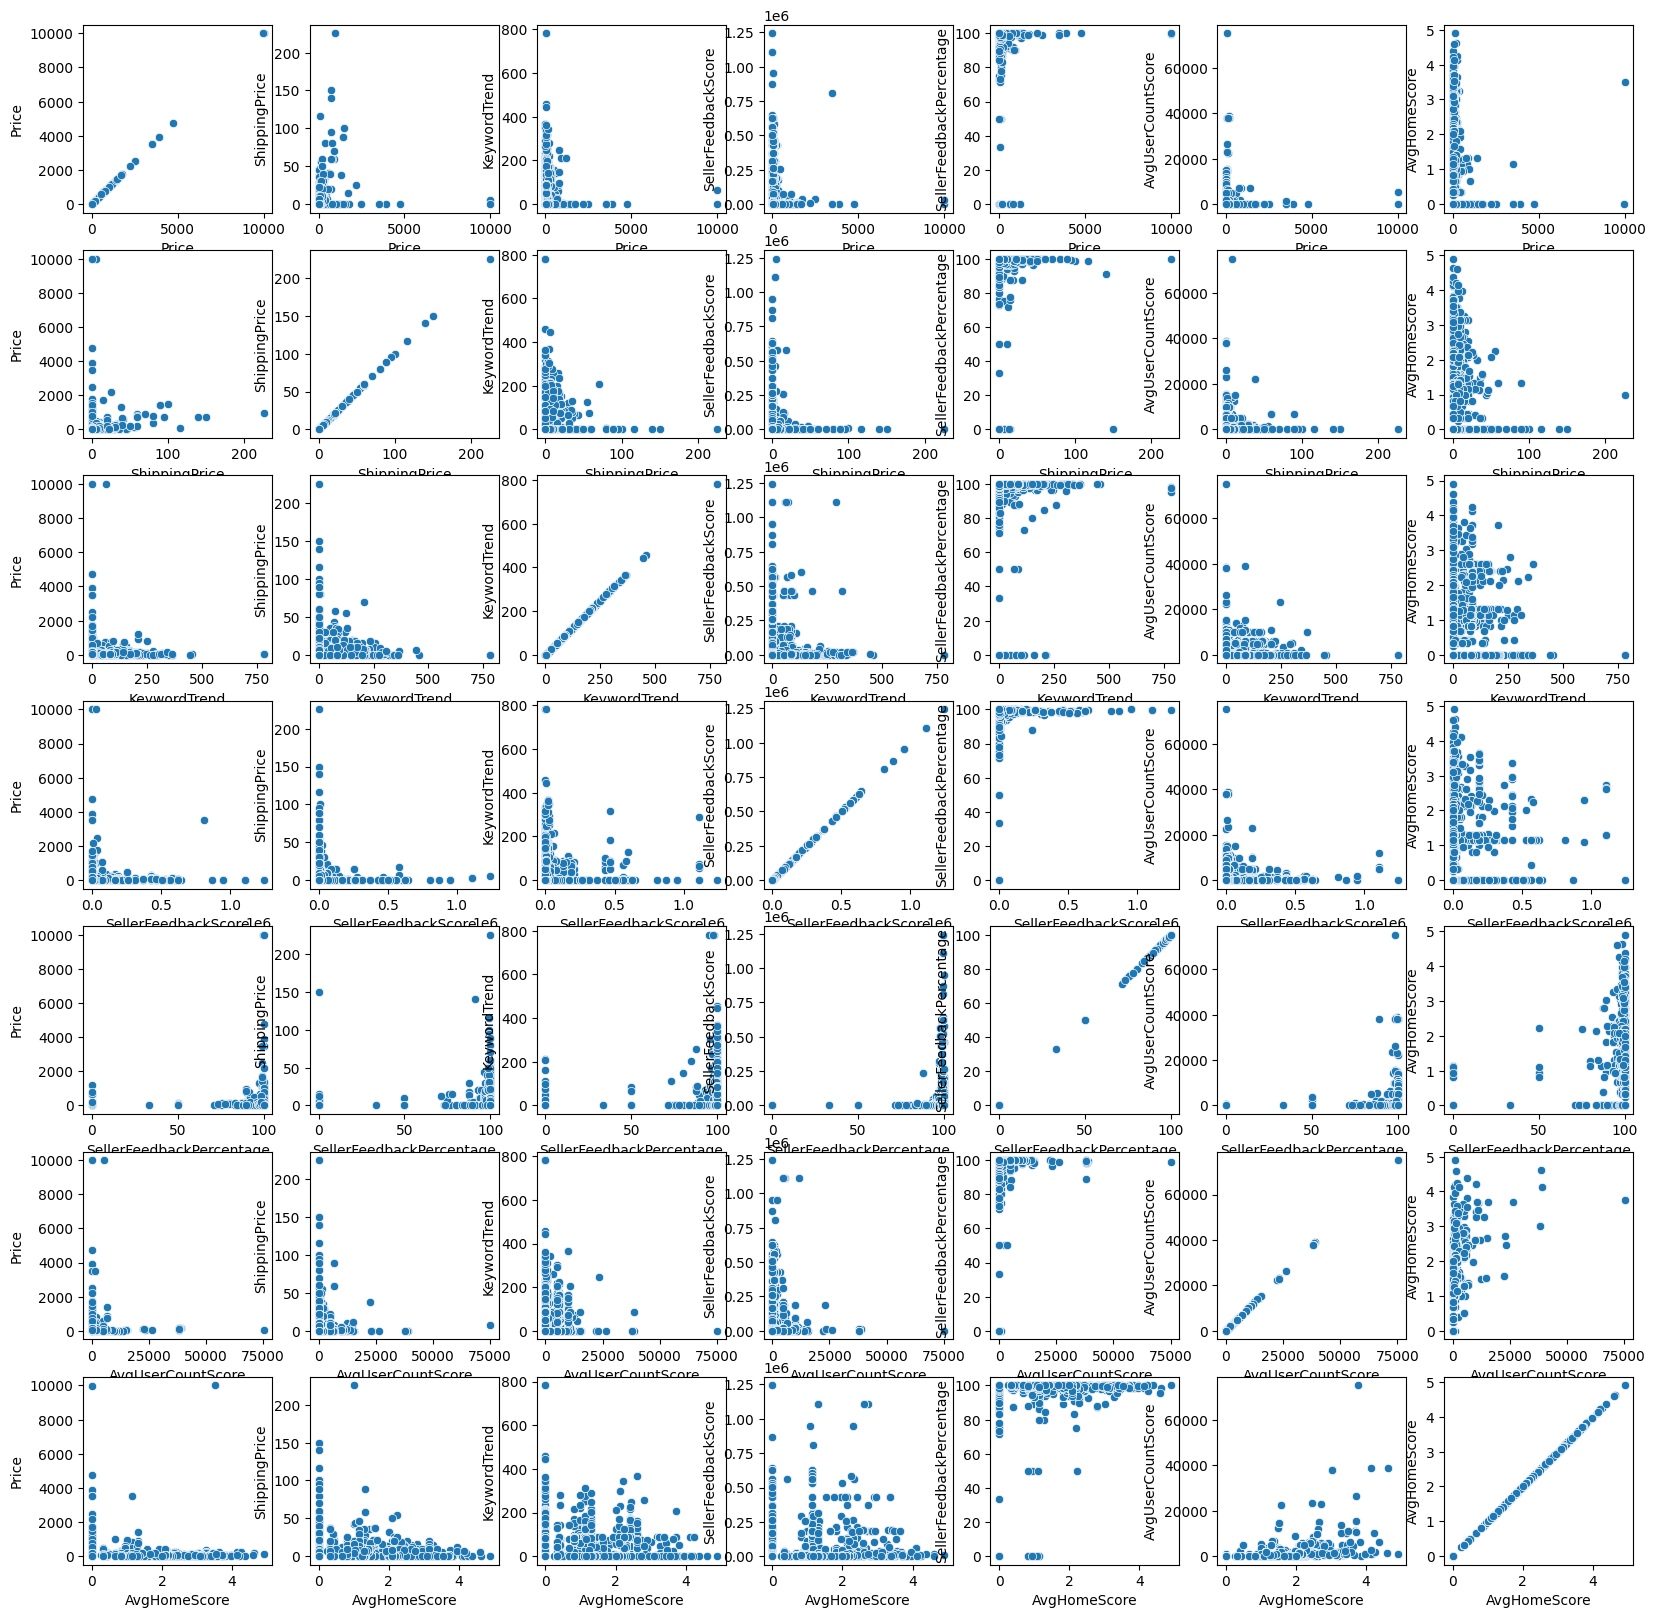

In [ ]:
numerical_cols = ['Price', 'ShippingPrice', 'KeywordTrend', 'SellerFeedbackScore', 'SellerFeedbackPercentage', 'AvgUserCountScore', 'AvgHomeScore']

plt.figure(figsize=(20, 20))
i = 1
for x in numerical_cols:
  for y in numerical_cols:
    plt.subplot(7, 7, i)
    sns.scatterplot(x=x, y=y, data=df)
    i += 1
# numerical_cols

<Axes: >

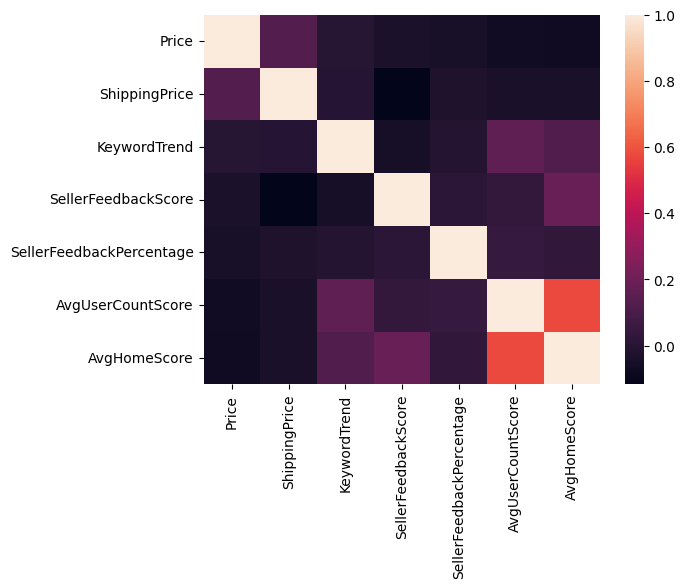

In [ ]:
sns.heatmap(df[numerical_cols].corr())

### Experimenting with Attribute Combination

In [ ]:
known_brands = {
    "adidas", "ASICS", "Ace The Moon", "ACEing Autism", "Alpha & RAB String", "Ame & Lulu",
    "Ashaway", "ASO", "Australian", "Australian Open", "Babolat", "Band-IT",
    "BB by Belen Berbel", "Bird & Vine", "Bjorn Borg", "BloqUV", "BlueFish Sport", "Blumaka",
    "BOAST", "Bolle", "Born To Rally", "BOSS", "Brooks", "Bubble", "Butterfly", "Cadence",
    "Cancha", "CoolNES", "Cortiglia", "Court Couture", "CourtLife", "Cross Court",
    "Denise Cronwall", "Diadem", "Diadora", "Doc & Glo", "DUC", "Dunlop", "Ektelon", "EleVen",
    "ellesse", "Fabletics", "Fairway", "Feetures", "Fila", "Fitsok", "Flow Society", "Forten",
    "FP Movement", "Gamma", "Geau Sport", "Genesis", "Glove It", "Goodr", "Gosen", "Grand Slam",
    "Grapplesnake", "Head", "HALO Hydration", "Hely Weber", "Hydro Flask", "Hydrogen", "IBKUL",
    "Incrediwear", "InPhorm", "Isospeed", "Jerdog", "Jofit", "Joma", "Joola", "Kirschbaum",
    "Klip", "Knockaround", "KSwiss", "Lacoste", "Lasso", "Le Coq Sportif", "Li Mi", "LIJA",
    "Lobster", "Lotto", "Lucky In Love", "Luxilon", "Maggie Mather", "Mizuno", "Mouratoglou Apparel",
    "MSV", "Nike", "New Balance", "Nick Kyrgios Foundation", "Nothing Major", "ON", "ON'RE",
    "Original Penguin", "OS1st", "Prince", "Penn", "PowerAngle", "Pro-Tec", "ProKennex",
    "ProSeries", "Puma", "Racquet Inc Gifts", "Rafa Nadal Academy", "REDVANLY", "Reebok", "Revo",
    "Roland Garros", "SaltStick", "SanSoleil", "Sergio Tacchini", "Signum-Pro", "Skechers",
    "Slazenger", "Slinger", "SmellWell", "Sofibella", "Solinco", "Spin It", "SSI - Sport Source International",
    "Sta Active", "Superfeet", "Surface", "Tail", "tasc", "Tecnifibre", "Tennis-Point",
    "Tennis Tutor", "Tennis Warehouse", "The Alabama Girl", "Thorlo", "Tifosi", "Topspin",
    "Toroline", "Tourna", "Travis Mathew", "Under Armour", "UomoSport", "VimHue", "Vitalyte",
    "Volkl", "Waterdrop", "Wilson", "Weiss CANNON", "Yonex", "Ytex", "Zamst", "2UNDR"
}

In [ ]:
import re
def extract_brand_model(title):
  title_lower = title.lower()
  found_brand = None

  for brand in known_brands:
    pattern = rf"(?i)(?<!\S){re.escape(brand)}(?!\S)"
    if re.search(pattern, title_lower):
      found_brand = brand
      break

  model = None
  if found_brand:
    remaining = title_lower.split(found_brand.lower(), 1)[1].strip()
    model_tokens = remaining.split()
    model = " ".join(model_tokens[:3]) if model_tokens else None

  return found_brand, model

df['Brand'], df['Model'] = zip(*df['Title'].map(extract_brand_model))

In [ ]:
df['BrandModel'] = df['Brand'] + ' ' + df['Model']

In [ ]:
prod_freq = pd.DataFrame(df['BrandModel'].value_counts()[:50]).style.background_gradient('viridis')
prod_freq

,count
BrandModel,
Nike air force 1,21
Butterfly table tennis racket,16
Nike air jordan 1,14
Babolat hard tennis racket,12
Nike air jordan 4,12
Butterfly fan zhendong super,12
Wilson pro staff 97,12
Yonex hard tennis racket,11
adidas fear of god,9


In [ ]:
df['ProdFreq'] = df['BrandModel'].map(df['BrandModel'].value_counts())

In [ ]:
def categorize(prod_freq):
  if prod_freq > 10:
    return 'Best Seller'
  if prod_freq > 2:
    return 'Trending'
  else:
    return 'Normal'

df['SellerCategory'] = df['ProdFreq'].apply(categorize)

In [ ]:
df['DeliveryLatency'] = (pd.to_datetime(df['MaxEstimatedDeliveryDate']) - pd.to_datetime(df['MinEstimatedDeliveryDate'])).dt.days

In [ ]:
df['ListingLatency'] = (pd.to_datetime(df['ItemCreationDate']) - pd.to_datetime(df['ItemOriginDate'])).dt.days

In [ ]:
df['OldProducts'] = df['ListingLatency'] > 0

In [ ]:
df['OriginToDelivery'] = (pd.to_datetime(df['MaxEstimatedDeliveryDate']) - pd.to_datetime(df['ItemOriginDate'])).dt.days

In [ ]:
df['WeightedSellerFeedback'] = df['SellerFeedbackPercentage'] * df['SellerFeedbackScore']

## Preparing data for Machine Learning Algorithms

In [ ]:
df_exp.drop(df_exp[df_exp.ItemId.duplicated()].index, inplace=True)
df_exp = df_exp.reset_index().drop(columns=['index'])

In [ ]:
df_exp.ItemId.duplicated().sum()

np.int64(0)

In [ ]:
unique_categories = df_exp['Category'].value_counts()
unwanted_categories = unique_categories[unique_categories==1].index.tolist()

df_exp.drop(df_exp[df_exp['Category'].isin(unwanted_categories)].index, inplace = True)

In [ ]:
try:
  df_exp.drop(columns=['URL', 'Image','Currency', 'ShippingCurrency', 'AdultOnly', 'LegacyItemId', 'ListingMarketplaceId'], inplace=True)
except:
  print('Already Dropped these cols.')

In [ ]:
df_exp['ProductVariation'] = df_exp['ItemId'].apply(lambda x: x.split('|')[2]).astype(int) > 0

In [ ]:
df_exp.drop(columns=['ItemId'], inplace=True)

In [ ]:
df_exp[['Category', 'Condition', 'ShippingCostType', 'ItemLocation']].to_csv('/content/drive/MyDrive/ProjectData/ebay_product_price_recommender/ebay_list_data.csv', index=False)

In [ ]:
df_exp.shape

(7369, 20)

In [ ]:
y = df_exp['Price']
X = df_exp.drop(columns=['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['Category'], shuffle=True)

In [ ]:
# class FeatureCombination(BaseEstimator, TransformerMixin):
#   def __init__(self):
#     pass

#   def fit(self, X, y=None):
#     self.n_features_in_ = X.shape[1]
#     self.feature_names_in_ = X.columns.tolist()
#     return self

#   def transform(self, X):
#     check_is_fitted(self)
#     assert(X.shape[1] == self.n_features_in_)
#     assert(X.columns.tolist() == self.feature_names_in_)
#     X = X.copy()


#     known_brands = {
#     "adidas", "ASICS", "Ace The Moon", "ACEing Autism", "Alpha & RAB String", "Ame & Lulu",
#     "Ashaway", "ASO", "Australian", "Australian Open", "Babolat", "Band-IT",
#     "BB by Belen Berbel", "Bird & Vine", "Bjorn Borg", "BloqUV", "BlueFish Sport", "Blumaka",
#     "BOAST", "Bolle", "Born To Rally", "BOSS", "Brooks", "Bubble", "Butterfly", "Cadence",
#     "Cancha", "CoolNES", "Cortiglia", "Court Couture", "CourtLife", "Cross Court",
#     "Denise Cronwall", "Diadem", "Diadora", "Doc & Glo", "DUC", "Dunlop", "Ektelon", "EleVen",
#     "ellesse", "Fabletics", "Fairway", "Feetures", "Fila", "Fitsok", "Flow Society", "Forten",
#     "FP Movement", "Gamma", "Geau Sport", "Genesis", "Glove It", "Goodr", "Gosen", "Grand Slam",
#     "Grapplesnake", "Head", "HALO Hydration", "Hely Weber", "Hydro Flask", "Hydrogen", "IBKUL",
#     "Incrediwear", "InPhorm", "Isospeed", "Jerdog", "Jofit", "Joma", "Joola", "Kirschbaum",
#     "Klip", "Knockaround", "KSwiss", "Lacoste", "Lasso", "Le Coq Sportif", "Li Mi", "LIJA",
#     "Lobster", "Lotto", "Lucky In Love", "Luxilon", "Maggie Mather", "Mizuno", "Mouratoglou Apparel",
#     "MSV", "Nike", "New Balance", "Nick Kyrgios Foundation", "Nothing Major", "ON", "ON'RE",
#     "Original Penguin", "OS1st", "Prince", "Penn", "PowerAngle", "Pro-Tec", "ProKennex",
#     "ProSeries", "Puma", "Racquet Inc Gifts", "Rafa Nadal Academy", "REDVANLY", "Reebok", "Revo",
#     "Roland Garros", "SaltStick", "SanSoleil", "Sergio Tacchini", "Signum-Pro", "Skechers",
#     "Slazenger", "Slinger", "SmellWell", "Sofibella", "Solinco", "Spin It", "SSI - Sport Source International",
#     "Sta Active", "Superfeet", "Surface", "Tail", "tasc", "Tecnifibre", "Tennis-Point",
#     "Tennis Tutor", "Tennis Warehouse", "The Alabama Girl", "Thorlo", "Tifosi", "Topspin",
#     "Toroline", "Tourna", "Travis Mathew", "Under Armour", "UomoSport", "VimHue", "Vitalyte",
#     "Volkl", "Waterdrop", "Wilson", "Weiss CANNON", "Yonex", "Ytex", "Zamst", "2UNDR"
#     }

#     def extract_brand_model(title):
#       title_lower = title.lower()
#       found_brand = None
#       for brand in known_brands:
#         pattern = rf"(?i)(?<!\S){re.escape(brand)}(?!\S)"
#         if re.search(pattern, title_lower):
#           found_brand = brand
#           break
#       model = None
#       if found_brand:
#         remaining = title_lower.split(found_brand.lower(), 1)[1].strip()
#         model_tokens = remaining.split()
#         model = " ".join(model_tokens[:3]) if model_tokens else None
#       return found_brand, model
#     X['Brand'], X['Model'] = zip(*X['Title'].map(extract_brand_model))

#     X['BrandModel'] = X['Brand'] + ' ' + X['Model']

#     X['ProdFreq'] = X['BrandModel'].map(X['BrandModel'].value_counts())

#     def categorize(prod_freq):
#       if prod_freq > 10:
#         return 'Best Seller'
#       if prod_freq > 2:
#         return 'Trending'
#       else:
#         return 'Normal'
#     X['SellerCategory'] = X['ProdFreq'].apply(categorize)

#     X['SellerFeedbackPercentageInv'] = max(X['SellerFeedbackPercentage'])+1 - X['SellerFeedbackPercentage']

#     X['DeliveryLatency'] = (pd.to_datetime(X['MaxEstimatedDeliveryDate']) - pd.to_datetime(X['MinEstimatedDeliveryDate'])).dt.days

#     X['ListingLatency'] = (pd.to_datetime(X['ItemCreationDate']) - pd.to_datetime(X['ItemOriginDate'])).dt.days

#     X['OldProducts'] = X['ListingLatency'] > 0

#     X['OriginToDelivery'] = (pd.to_datetime(X['MaxEstimatedDeliveryDate']) - pd.to_datetime(X['ItemOriginDate'])).dt.days

#     X['WeightedSellerFeedback'] = X['SellerFeedbackPercentage'] * X['SellerFeedbackScore']

#     X['Brand'].fillna('missing')
#     X['ProdFreq'].fillna(0)

#     #Remove unwanted Columns
#     X.drop(columns = ['Title', 'MinEstimatedDeliveryDate', 'MaxEstimatedDeliveryDate',
#                     'ItemOriginDate', 'ItemCreationDate','Model', 'BrandModel',
#                       'SellerFeedbackPercentage'], inplace=True)

#     self.n_features_out_ = X.shape[1]
#     self.feature_names_out_ = X.columns.tolist()

#     return X

#   def get_feature_names_out(self, input_features=None):
#     if input_features is None:
#       if hasattr(self, "feature_names_out_"):
#         return self.feature_names_out_

#       else:
#         return self.feature_names_in_

#     if hasattr(self, "n_features_out_"):
#       if (self.n_features_out_ == len(input_features)):
#         return input_features
#       else:
#         return "Input feature size does not match the number of columns."

#     else:
#       if (self.n_features_in_ == len(input_features)):
#         return input_features
#       else:
#         return "Input feature size does not match the number of columns."

In [ ]:
# fc = FeatureCombination()
# df_exp_transformed = fc.fit_transform(X_train)

In [ ]:
# numerical_cols = df_exp_transformed.select_dtypes(include=[int, float]).columns.tolist()
# len(numerical_cols)

In [ ]:
# sns.histplot(x='Price', data=df_exp, bins=30)

In [ ]:
# log_transform1 = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
# df_exp['Price'] = log_transform1.fit_transform(df_exp['Price'])

In [ ]:
# plt.figure(figsize=(15, 15))
# for i in range(len(numerical_cols)):
#   plt.subplot(4, 3, i+1)
#   sns.histplot(x=numerical_cols[i], data=df_exp_transformed, bins=30)

In [ ]:
# log_transform = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
# df_exp_transformed[numerical_cols] = log_transform.fit_transform(df_exp_transformed[numerical_cols])

In [ ]:

# def get_column_selector(dtype_include):
#   def _selector(X):
#     return X.select_dtypes(include=dtype_include).columns.tolist()
#   return _selector

In [ ]:
log_transform = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, feature_names_out='one-to-one')

# def numeric_selector(X):
#   return X.select_dtypes(include=[int, float]).columns.tolist()

# def categorical_selector(X):
#   return X.select_dtypes(include=object).columns.tolist()

In [ ]:
from pipeline_code.feature_combination import FeatureCombination
from pipeline_code.select_dtypes import numeric_selector, categorical_selector

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', log_transform),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numeric_selector),
    ('cat_pipeline', cat_pipeline, categorical_selector)
])


full_pipeline = Pipeline(steps=[
    ('fc', FeatureCombination()),
    ('preprocessor', preprocessor)
])
full_pipeline

Pipeline(steps=[('fc', FeatureCombination()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>,
                                                                                       inverse_func=<ufunc 'expm1'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <function numeric_selector at 0x7a60342b2d40>),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <function categorical_selector at 0x7a5fd5195300>)]))])

In [ ]:
fp = full_pipeline
X_train_transformed = fp.fit_transform(X_train)

## Select and Train the model

In [ ]:
lr = LinearRegression()
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
elastic = ElasticNet(random_state=42)
lin_svr = LinearSVR(random_state=42)
svr = SVR()
dtr = DecisionTreeRegressor(random_state=42)
etr = ExtraTreeRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)
etsr = ExtraTreesRegressor(random_state=42)
abr = AdaBoostRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
hgbr = HistGradientBoostingRegressor(random_state=42)
knr = KNeighborsRegressor()
xgbr = XGBRegressor()
cbr = CatBoostRegressor(random_state=42)
lgbmr = LGBMRegressor(random_state=42)

models = {'lr':lr, 'ridge':ridge, 'lasso':lasso, 'elastic':elastic, 'lin_svr':lin_svr, 'svr':svr,
         'dtr':dtr, 'etr':etr, 'rfr':rfr ,'etsr':etsr, 'abr':abr, 'gbr':gbr, 'hgbr':hgbr,
         'knr':knr, 'xgbr':xgbr, 'cbr':cbr, 'lgbmr':lgbmr}

wrapped_models = {name:TransformedTargetRegressor(
    regressor=mdl,
    func= lambda y: np.log1p(np.log1p(y)),
    inverse_func= lambda y: np.expm1(np.expm1(y))
) for name, mdl in models.items()
}

In [ ]:
lgbmr_ttr = TransformedTargetRegressor(regressor=lgbmr, func = lambda y: np.log1p(np.log1p(y)),
    inverse_func= lambda y: np.expm1(np.expm1(y)) )

In [ ]:
features = full_pipeline.get_feature_names_out()

In [ ]:
lgbmr_ttr.fit(X_train_transformed, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1877
[LightGBM] [Info] Number of data points in the train set: 5895, number of used features: 81
[LightGBM] [Info] Start training from score 1.446979


TransformedTargetRegressor(func=<function <lambda> at 0x7a5fd3924720>,
                           inverse_func=<function <lambda> at 0x7a5fd3927b00>,
                           regressor=LGBMRegressor(random_state=42))

In [ ]:
importances = lgbmr_ttr.regressor_.feature_importances_

In [ ]:
#Checking important features
feature_importances_dict = dict(zip(features, importances))

sorted_feature_importances_dict = sorted(feature_importances_dict.items(), key = lambda x: x[1], reverse=True)
sorted_feature_importances_dict[:20]

[('num_pipeline__SellerFeedbackScore', np.int32(458)),
 ('num_pipeline__ShippingPrice', np.int32(355)),
 ('num_pipeline__OriginToDelivery', np.int32(343)),
 ('num_pipeline__SellerFeedbackPercentageInv', np.int32(239)),
 ('num_pipeline__KeywordTrend', np.int32(221)),
 ('num_pipeline__AvgUserCountScore', np.int32(151)),
 ('num_pipeline__AvgHomeScore', np.int32(126)),
 ('num_pipeline__DeliveryLatency', np.int32(121)),
 ('num_pipeline__WeightedSellerFeedback', np.int32(120)),
 ('num_pipeline__ListingLatency', np.int32(70)),
 ('cat_pipeline__Condition_New', np.int32(53)),
 ('cat_pipeline__Brand_None', np.int32(42)),
 ('cat_pipeline__Category_Racquetball', np.int32(40)),
 ('num_pipeline__ProdFreq', np.int32(36)),
 ('cat_pipeline__Category_Training Aids', np.int32(36)),
 ('cat_pipeline__Category_Racquets', np.int32(29)),
 ('cat_pipeline__ItemLocation_US', np.int32(27)),
 ('cat_pipeline__Condition_Used', np.int32(24)),
 ('cat_pipeline__Category_Paddles', np.int32(23)),
 ('cat_pipeline__Categor

In [ ]:
scores={}
for name, mdl in wrapped_models.items():
  score = -cross_val_score(mdl, X_train_transformed[:5000], y_train[:5000], scoring='neg_root_mean_squared_error', cv=3)
  scores[name] = score.mean()

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Learning rate set to 0.049521
0:	learn: 0.3572146	total: 50.4ms	remaining: 50.4s
1:	learn: 0.3458872	total: 53.9ms	remaining: 26.9s
2:	learn: 0.3360547	total: 57.2ms	remaining: 19s
3:	learn: 0.3265257	total: 60.5ms	remaining: 15.1s
4:	learn: 0.3173377	total: 63.8ms	remaining: 12.7s
5:	learn: 0.3085123	total: 67.3ms	remaining: 11.2s
6:	learn: 0.3007971	total: 70.7ms	remaining: 10s
7:	learn: 0.2933159	total: 74ms	remaining: 9.18s
8:	learn: 0.2861003	total: 77.4ms	remaining: 8.52s
9:	learn: 0.2795143	total: 80.7ms	remaining: 7.99s
10:	learn: 0.2733097	total: 84ms	remaining: 7.55s
11:	learn: 0.2673439	total: 87.2ms	remaining: 7.18s
12:	learn: 0.2617307	total: 90.5ms	remaining: 6.87s
13:	learn: 0.2567680	total: 93.9ms	remaining: 6.61s
14:	learn: 0.2521726	total: 97.2ms	remaining: 6.38s
15:	learn: 0.2474134	total: 101ms	remaining: 6.19s
16:	learn: 0.2434811	total: 104ms	remaining: 6.01s
17:	learn: 0.2394246	total: 107ms	remaining: 5.86s
18:	learn: 0.2355266	total: 111ms	remaining: 5.71s
19:	

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1597
[LightGBM] [Info] Number of data points in the train set: 3333, number of used features: 69
[LightGBM] [Info] Start training from score 1.441084


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1584
[LightGBM] [Info] Number of data points in the train set: 3334, number of used features: 67
[LightGBM] [Info] Start training from score 1.452124


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
scores
sorted_dict = dict(sorted(scores.items(), key=lambda item: item[1]))
sorted_dict

{'rfr': np.float64(242.7141726846452),
 'hgbr': np.float64(243.6714048569971),
 'lgbmr': np.float64(243.72252156542547),
 'cbr': np.float64(244.1576142459513),
 'svr': np.float64(244.33373390121218),
 'ridge': np.float64(245.90567338197965),
 'gbr': np.float64(245.9598716604959),
 'knr': np.float64(246.20404153218183),
 'lin_svr': np.float64(246.24920889573636),
 'lr': np.float64(246.86756375294058),
 'xgbr': np.float64(249.5671596565672),
 'abr': np.float64(249.8071843481229),
 'lasso': np.float64(253.79555086880384),
 'elastic': np.float64(253.79555086880384),
 'etsr': np.float64(268.459779282611),
 'etr': np.float64(335.95591819018136),
 'dtr': np.float64(376.73258470778757)}

## Fine Tuning the model

In [ ]:
# ridge, lasso, elasticnet, lin_svr, svr, rfr, knr, abr, hgbr, cbr, lgbmr

In [ ]:
from scipy.stats import uniform, randint, loguniform

### ridge

In [ ]:
# ridge_params = {
#     'regressor__tol': loguniform(10e-5, 10e-3),
#     'regressor__alpha': loguniform(10, 1000),
#     'regressor__solver':['auto', 'lsqr', 'saga']
# }

# ridge_rscv = RandomizedSearchCV(wrapped_models['ridge'], param_distributions=ridge_params, scoring='neg_root_mean_squared_error',n_iter=50, cv=3, verbose=2)
# ridge_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# ridge_rscv.best_score_

### lasso

In [ ]:
# lasso_params = {
#     'regressor__tol': loguniform(10e-5, 10e-2),
#     'regressor__alpha': loguniform(1, 1000),
#     'regressor__max_iter': randint(1000, 100000)
# }

# lasso_rscv = RandomizedSearchCV(wrapped_models['lasso'], param_distributions=lasso_params, scoring='neg_root_mean_squared_error',n_iter=50, cv=3, verbose=2)
# lasso_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# lasso_rscv.best_score_

### elasticnet

In [ ]:
# elastic_params = {
#     'regressor__tol': loguniform(10e-5, 10e-2),
#     'regressor__alpha': loguniform(1, 1000),
#     'regressor__max_iter': randint(1000, 100000),
#     'regressor__l1_ratio':uniform(0, 1)
# }

# elastic_rscv = RandomizedSearchCV(wrapped_models['elastic'], param_distributions=elastic_params, scoring='neg_root_mean_squared_error',n_iter=50, cv=3, verbose=2)
# elastic_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# elastic_rscv.best_score_

### linear svr

In [ ]:
# lin_svr_params={
#     'regressor__tol': loguniform(10e-5, 10e-2),
#     'regressor__C': loguniform(1, 10000)
# }

# lin_svr_rscv = RandomizedSearchCV(wrapped_models['lin_svr'], param_distributions=lin_svr_params, scoring='neg_root_mean_squared_error', n_iter=50, cv=3, verbose=2)
# lin_svr_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# lin_svr_rscv.best_score_

### svr

In [ ]:
# svr_params=[{
#     'regressor__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
#     'regressor__degree':randint(2, 5),
#     'regressor__gamma':['scale', 'auto'],
#     'regressor__C': loguniform(1, 10000)
# },
#                 {
#     'regressor__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
#     'regressor__degree':randint(2, 5),
#     'regressor__gamma':loguniform(0, 1000),
#     'regressor__C': loguniform(1, 10000)
#                 }
#                 ]

# svr_rscv = RandomizedSearchCV(wrapped_models['svr'], param_distributions=lin_svr_params, scoring='neg_root_mean_squared_error', n_iter=50, cv=3, verbose=2)
# svr_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# svr_rscv.best_score_

In [ ]:
# svr_rscv.best_params_

### rfr

In [ ]:
# rfr_params = {
#     'regressor__n_estimators':randint(100, 2000),
#     'regressor__max_depth':randint(5, 20),
#     'regressor__max_leaf_nodes':randint(10, 1000),
#     'regressor__min_samples_leaf':randint(1, 10)

# }

# rfr_rscv = RandomizedSearchCV(wrapped_models['rfr'], param_distributions=rfr_params, scoring='neg_root_mean_squared_error', n_iter=50, cv=3, verbose=2)
# rfr_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# rfr_rscv.best_score_

### knr

In [ ]:
# knr_params = {
#     'regressor__n_neighbors':randint(5, 50),
#     'regressor__weights':['uniform', 'distance'],
#     'regressor__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
# }

# knr_rscv = RandomizedSearchCV(wrapped_models['knr'], param_distributions=knr_params, scoring='neg_root_mean_squared_error', n_iter=50, cv=3, verbose=2)
# knr_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# knr_rscv.best_score_

### abr

In [ ]:
# abr_params = {
#     'regressor__n_estimators':randint(50, 1000),
#     'regressor__learning_rate':loguniform(1, 1000),
#     'regressor__loss':['linear', 'square', 'exponential']
# }

# abr_rscv = RandomizedSearchCV(wrapped_models['abr'], param_distributions=abr_params, scoring='neg_root_mean_squared_error', n_iter=50, cv=3, verbose=2)
# abr_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# abr_rscv.best_score_

### hgbr

In [ ]:
# hgbr_params = {
#     'regressor__learning_rate':loguniform(1e-3, 1),
#     'regressor__max_iter':randint(100, 1000),
#     'regressor__max_leaf_nodes':randint(40, 1000),
#     'regressor__max_depth':randint(5, 20),
#     'regressor__min_samples_leaf':randint(10, 25),
#     'regressor__l2_regularization':loguniform(0.1, 100)

# }

# hgbr_rscv = RandomizedSearchCV(wrapped_models['hgbr'],  param_distributions=hgbr_params, scoring='neg_root_mean_squared_error', n_iter=50, cv=3, verbose=2)
# hgbr_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# hgbr_rscv.best_score_

### xgbr

In [ ]:
# xgbr_params={
#     'regressor__eta':loguniform(1e-3, 1),
#     'regressor__n_estimators':randint(100, 1000),
#     'regressor__max_depth':randint(5, 20),
#     'regressor__subsample':uniform(0.2, 1),
#     'regressor__colsample_bytree':uniform(0.2, 1)

# }


# xgbr_rscv = RandomizedSearchCV(wrapped_models['xgbr'], param_distributions=xgbr_params,  scoring = 'neg_root_mean_squared_error', n_iter=50, cv=3, verbose=2)
# xgbr_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# xgbr_rscv.best_score_

### catboost

In [ ]:
# cbr_params={
#     'regressor__learning_rate':loguniform(1e-3, 1),
#     'regressor__iterations':randint(100, 1000),
#     'regressor__depth':randint(5, 20),
#     'regressor__l2_leaf_reg':loguniform(0.1, 100),
#     'regressor__bagging_temperature':loguniform(1, 100)
# }

# cbr_rscv = RandomizedSearchCV(wrapped_models['cbr'], param_distributions=cbr_params, scoring = 'neg_root_mean_squared_error', n_iter=10, cv=3, verbose=2)
# cbr_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# cbr_rscv.best_score_

In [ ]:
# cbr_rscv.best_params_

### lightgbm

In [ ]:
# lgbmr_params = {
#     'regressor__learning_rate':loguniform(1e-3, 1),
#     'regressor__num_iterations':randint(100, 2000),
#     'regressor__max_depth':randint(5, 20),
#     'regressor__num_leaves':randint(50, 1000),
#     'regressor__min_data_in_leaf':randint(10, 25),
#     'regressor__bagging_fraction':uniform(0.2, 1),
#     'regressor__bagging_freq':randint(1, 10)


# }

# lgbmr_rscv = RandomizedSearchCV(wrapped_models['lgbmr'], param_distributions=lgbmr_params, scoring = 'neg_root_mean_squared_error', n_iter=50, cv=3, verbose=2)
# lgbmr_rscv.fit(X_train_transformed[:5000], y_train[:5000])

In [ ]:
# lgbmr_rscv.best_score_

### voting regressor

In [ ]:
from pipeline_code.transformed_target_regressor import log1p_func, expm1_func

ridge = Ridge(alpha=np.float64(11.237911676467688), random_state=42, solver='saga',
      tol=np.float64(0.0020630941252814997))


lasso = Lasso(alpha=np.float64(70.5005047194931), max_iter=35426, random_state=42,
      tol=np.float64(0.0008717435755481077))


elastic = ElasticNet(alpha=np.float64(1.687911954169764),
           l1_ratio=np.float64(0.03529610936757355), max_iter=26372,
           random_state=42, tol=np.float64(0.00211422271284827))



lin_svr = LinearSVR(C=np.float64(2.0536538662088266), random_state=42,
tol=np.float64(0.03662096621393204))


svr = SVR(C=np.float64(4.223294575561173), tol=np.float64(0.03456285829796711))



rfr = RandomForestRegressor(max_depth=19, max_leaf_nodes=906, n_estimators=1868,
                      random_state=42)


knr = KNeighborsRegressor(algorithm='brute', weights='distance')




abr = AdaBoostRegressor(learning_rate=np.float64(12.292677780938527),
                  loss='exponential', n_estimators=614, random_state=42)




hgbr = HistGradientBoostingRegressor(l2_regularization=np.float64(0.23722721838728336),
                              learning_rate=np.float64(0.02208137900248321),
                              max_depth=16, max_iter=908, max_leaf_nodes=862,
min_samples_leaf=11, random_state=42)



xgbr = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=np.float64(0.6052610979683148), device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eta=np.float64(0.17404090384338503), eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=644)



cbr = CatBoostRegressor(bagging_temperature=np.float64(2.109885800151555), depth=7,
                        iterations=934, l2_leaf_reg=np.float64(4.090570758125601),
                        learning_rate=np.float64(0.0568517905012706))



lgbmr = LGBMRegressor(bagging_fraction=np.float64(0.9408148222493404), bagging_freq=8,
              learning_rate=np.float64(0.037460643489634), max_depth=7,
              min_data_in_leaf=19, num_iterations=1155, num_leaves=304,
              random_state=42)


# def log1p_func(y):
#   return np.log1p(np.log1p(y))

# def expm1_func(y):
#   return np.expm1(np.expm1(y))


estimators = [
    ('ridge', TransformedTargetRegressor(
    regressor=ridge,
    func= log1p_func,
    inverse_func= expm1_func)),

    ('lasso', TransformedTargetRegressor(
    regressor=lasso,
    func= log1p_func,
    inverse_func= expm1_func)),

    ('elastic', TransformedTargetRegressor(
    regressor=elastic,
    func= log1p_func,
    inverse_func= expm1_func)),

    ('lin_svr', TransformedTargetRegressor(
    regressor=lin_svr,
    func= log1p_func,
    inverse_func= expm1_func)),

    ('svr', TransformedTargetRegressor(
    regressor=svr,
    func= log1p_func,
    inverse_func= expm1_func)),

    # ('rfr', TransformedTargetRegressor(
    # regressor=rfr,
    # func= log1p_func,
    # inverse_func= expm1_func)),

    ('knr', TransformedTargetRegressor(
    regressor=knr,
    func= log1p_func,
    inverse_func= expm1_func)),

    ('abr', TransformedTargetRegressor(
    regressor=abr,
    func= log1p_func,
    inverse_func= expm1_func)),

    ('hgbr', TransformedTargetRegressor(
    regressor=hgbr,
    func= log1p_func,
    inverse_func= expm1_func)),

    ('xgbr', TransformedTargetRegressor(
    regressor=xgbr,
    func= log1p_func,
    inverse_func= expm1_func)),

    ('cbr', TransformedTargetRegressor(
    regressor=cbr,
    func= log1p_func,
    inverse_func= expm1_func)),

    ('lgbmr', TransformedTargetRegressor(
    regressor=lgbmr,
    func= log1p_func,
    inverse_func= expm1_func))
]

vr = VotingRegressor(estimators=estimators, verbose=True)
# vr.fit(X_train_transformed, y_train)

In [ ]:
from pipeline_code.feature_combination import FeatureCombination
from pipeline_code.select_dtypes import numeric_selector, categorical_selector
from pipeline_code.transformed_target_regressor import log1p_func, expm1_func

vr_pipeline = Pipeline(steps=[
    ('full_pipeline', full_pipeline),
    ('vr', vr)
])

vr_pipeline.fit(X_train, y_train)

[Voting] ................... (1 of 11) Processing ridge, total=   1.2s
[Voting] ................... (2 of 11) Processing lasso, total=   0.0s
[Voting] ................. (3 of 11) Processing elastic, total=   0.0s
[Voting] ................. (4 of 11) Processing lin_svr, total=   0.5s
[Voting] ..................... (5 of 11) Processing svr, total=   4.4s
[Voting] ..................... (6 of 11) Processing knr, total=   0.0s
[Voting] ..................... (7 of 11) Processing abr, total=  11.3s
[Voting] .................... (8 of 11) Processing hgbr, total=  42.0s
[Voting] .................... (9 of 11) Processing xgbr, total=   9.4s
0:	learn: 0.3546354	total: 8.01ms	remaining: 7.48s
1:	learn: 0.3417225	total: 14.5ms	remaining: 6.77s
2:	learn: 0.3295621	total: 21.9ms	remaining: 6.78s
3:	learn: 0.3187239	total: 29.1ms	remaining: 6.77s
4:	learn: 0.3078333	total: 36.5ms	remaining: 6.78s
5:	learn: 0.2976571	total: 43.5ms	remaining: 6.73s
6:	learn: 0.2886557	total: 50.4ms	remaining: 6.67s
7:	l

Pipeline(steps=[('full_pipeline',
                 Pipeline(steps=[('fc', FeatureCombination()),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num_pipeline',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('log_transform',
                                                                                    FunctionTransformer(feature_names_out='one-to-one',
                                                                                                        func=<ufunc 'log1p'>,
                                                                                                        inverse_func=<ufunc 'expm1'>)),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <function numeric_...
                                              TransformedTargetRegressor(func=<function log1p_func at 0x7a5fd4d7da80>,
                                                                         inverse_func=<function expm1_func at 0x7a5fd4d7e020>,
                                                                         regressor=LGBMRegressor(bagging_fraction=np.float64(0.9408148222493404),
                                                                                                 bagging_freq=8,
                                                                                                 learning_rate=np.float64(0.037460643489634),
                                                                                                 max_depth=7,
                                                                                                 min_data_in_leaf=19,
                                                                                                 num_iterations=1155,
                                                                                                 num_leaves=304,
                                                                                                 random_state=42)))],
                                 verbose=True))])

## Evalutaion on Test Set

In [ ]:
X_test.head()

,Title,Category,SellerFeedbackPercentage,SellerFeedbackScore,Condition,ShippingCostType,ShippingPrice,MinEstimatedDeliveryDate,MaxEstimatedDeliveryDate,ItemLocation,AvailableCoupons,ItemOriginDate,ItemCreationDate,TopRatedBuyingExperience,PriorityListing,KeywordTrend,AvgUserCountScore,AvgHomeScore,ProductVariation
3474,1977 Topps Baseball Cards U Pick singles $1.25...,Trading Card Singles,99.8,12086,Ungraded,FIXED,0.00,2025-08-15T07:00:00.000Z,2025-08-19T07:00:00.000Z,US,False,2019-09-01T00:48:00.000Z,2019-09-01T00:48:00.000Z,False,False,14.419355,10882.52,3.48,True
1392,Pickleballs - 18 NEW Balls For Indoor use. GRE...,Other Tennis & Racquet Sports,100.0,138,New,FIXED,0.00,2025-08-18T07:00:00.000Z,2025-08-25T07:00:00.000Z,US,False,2024-12-14T17:55:13.000Z,2025-07-05T22:04:41.000Z,False,False,0.000000,17.96,0.94,False
2867,A9952- 1992 Topps Kids Baseball Card #s 1-132 ...,Trading Card Singles,99.9,101393,Ungraded,FIXED,0.79,2025-08-16T07:00:00.000Z,2025-08-20T07:00:00.000Z,US,False,2022-02-09T19:45:13.000Z,2022-02-09T19:45:13.000Z,True,False,26.290323,4927.57,1.30,True
4153,Ektelon Thunder Stick Racquetball Racket Blue/...,Racquetball,99.8,1453,Used,FIXED,8.99,2025-08-15T07:00:00.000Z,2025-08-18T07:00:00.000Z,US,False,2024-09-26T16:06:54.000Z,2025-07-26T14:08:18.000Z,True,False,10.967742,0.00,0.00,False
6651,NITTAKU - INNER CASE - Table Tennis Case,Paddles,100.0,179,New,FIXED,22.00,NaN,NaN,JP,False,2024-04-16T15:11:12.000Z,2024-04-16T15:11:12.000Z,False,False,0.000000,0.00,0.00,False


In [ ]:
root_mean_squared_error(vr_pipeline.predict(X_test), y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] bagging_fraction is set=0.9408148222493404, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9408148222493404


132.61547659469235

In [ ]:
new = pd.DataFrame({'Title':'Yandex 12pcs racket', 'Category':'Racket','SellerFeedbackPercentage':14,
                    'SellerFeedbackScore':100, 'Condition':'Old', 'ShippingCostType':'Calculated', 'ShippingPrice':400,
                    'MinEstimatedDeliveryDate': '2025-08-16T07:00:00.000Z',	'MaxEstimatedDeliveryDate': '2025-08-20T07:00:00.000Z',
                     'ItemLocation':'US',  'AvailableCoupons':True, 'ItemOriginDate':'2024-08-20T03:13:29.000Z',	'ItemCreationDate':'2024-08-20T03:13:29.000Z',
                    'TopRatedBuyingExperience':True,'PriorityListing':False, 'KeywordTrend':182.483871, 'AvgUserCountScore':97.64,	'AvgHomeScore':0.14, 'ProductVariation': False}, index=[0])

vr_pipeline.predict(new)

[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] bagging_fraction is set=0.9408148222493404, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9408148222493404


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


array([170.30091524])

In [ ]:
import pickle
with open('vr_pipeline.pkl', 'wb') as file:
  pickle.dump(vr_pipeline, file)

In [ ]:
with open('vr_pipeline.pkl', 'rb') as  file:
  model = pickle.load(file)

In [ ]:
model.predict(new)

[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] bagging_fraction is set=0.9408148222493404, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9408148222493404


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


array([170.30091524])